In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.append('F:/HLL/SpatialCell')
import random
random.seed(42)
import os
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append('F:/HLL/SpatialCell/SpatialCell')

In [2]:
import SpatialCell.tool.utils as sptu
import SpatialCell.tool.infiltrate as infiltrate

In [3]:
import importlib
importlib.reload(sptu) 

<module 'SpatialCell.tool.utils' from 'F:\\HLL/SpatialCell\\SpatialCell\\tool\\utils.py'>

In [4]:
adata = sc.read_h5ad('F:/HLL/SpatialCell/data/traingulation.h5ad')

In [5]:
adata.obs['distance']= np.nan
label = 'label'
id='Image'
batch='Parent'
center_cell = 'SPON2'
x,y = 'Centroid X µm','Centroid Y µm'

In [6]:
infiltrate.infltrate(adata ,
              label = 'label',
              id='Image',
              batch='Parent',
              center_cell = center_cell,
              x = 'Centroid X µm',
              y='Centroid Y µm')

Image:2003356 Parent:TC2 not have filtered points
Image:2003356 Parent:TC1 not have filtered points
Image:2003356 Parent:TC1 not have a shape
Image:2003803-1 Parent:TC1 not have filtered points
Image:2003803-1 Parent:TC1 not have a shape
Image:2140864 Parent:TC3 not have filtered points


In [7]:
value = f'infiltrate_to_{center_cell}'
figdf = adata.obs[[value,label,id,batch]]

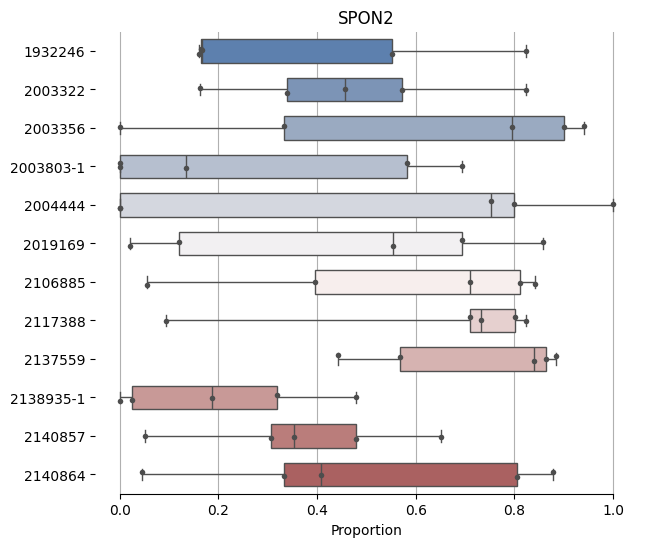

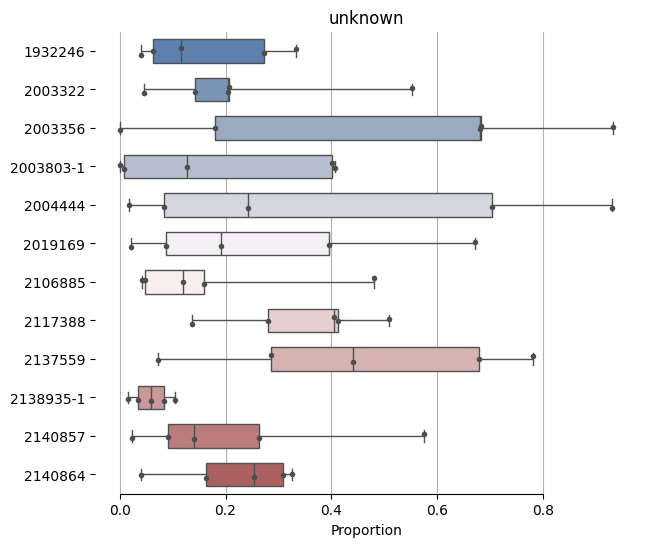

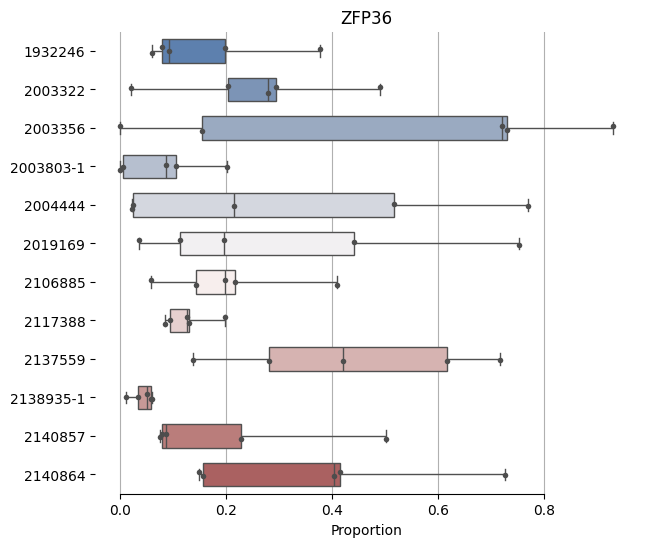

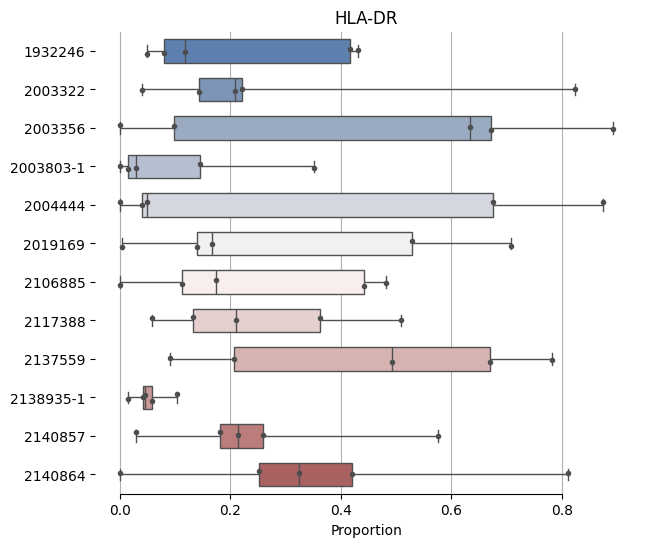

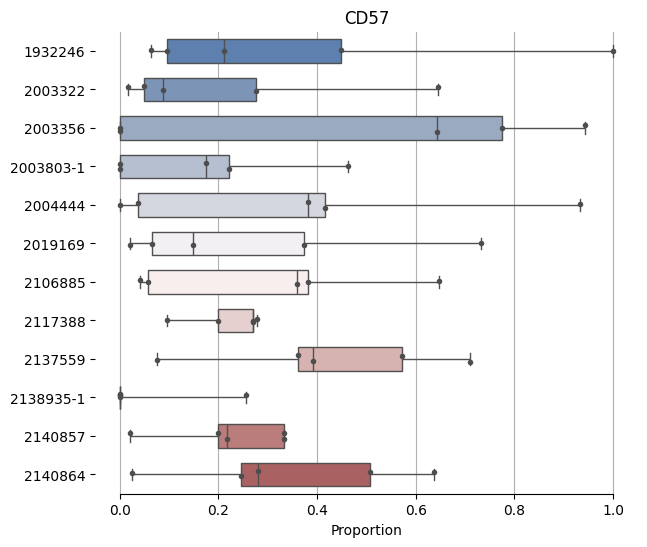

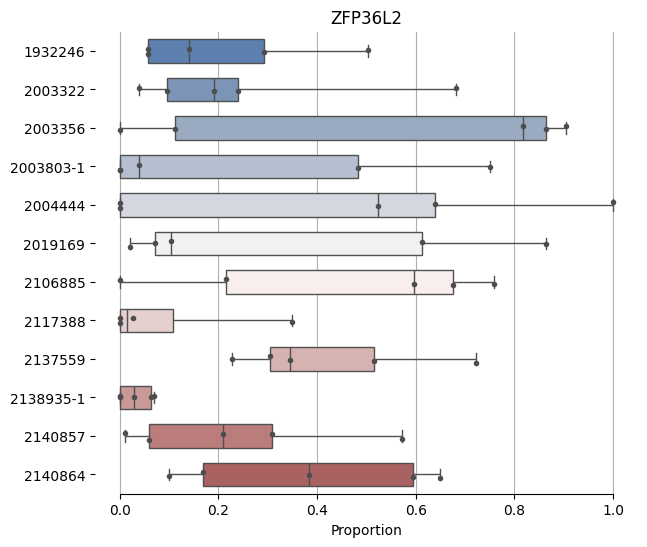

In [8]:
for i in figdf['label'].unique():
    df = figdf[figdf['label'] == i]
    result = (
    df.groupby(['Image', 'Parent'])
    .apply(lambda group: (group[value] < 0).mean())  # 计算比例
    .reset_index(name='Proportion')  # 将结果转换为 DataFrame
    )
    
    # Initialize the figure with a logarithmic x axis
    f, ax = plt.subplots(figsize=(7, 6))

    # Plot the orbital period with horizontal boxes
    sns.boxplot(
        result, x="Proportion", y="Image",
        whis=[0, 100], width=.6, palette="vlag")

    # Add in points to show each observation
    sns.stripplot(result, x="Proportion", y="Image", size=4, color=".3")

    # Tweak the visual presentation
    ax.xaxis.grid(True)
    ax.set(ylabel="")
    sns.despine(trim=True, left=True)
    plt.title(i)
    plt.savefig(f'F:/HLL/SpatialCell/fig/distance/{i}.png')


In [9]:
result = (
    figdf.groupby(['label','Image']).
        apply(lambda group: (group[value] < 0).mean()).
        reset_index(name='Proportion') # 将结果转换为 DataFrame
    )
result = sptu.sorted_df(result,'Proportion','label' , ascending=False)

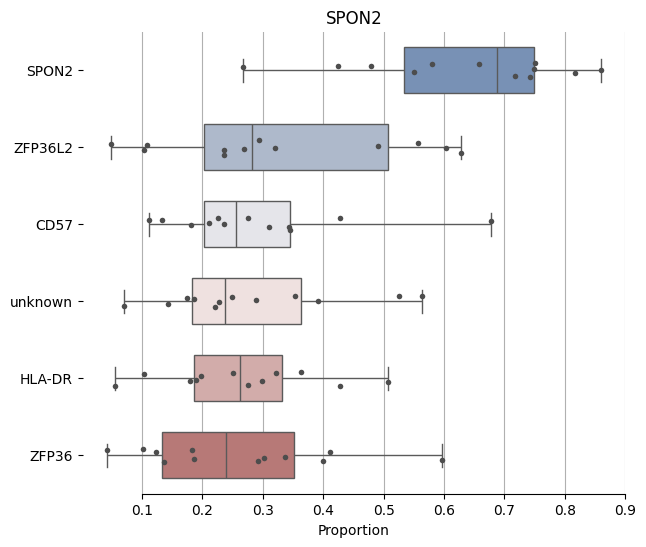

In [10]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

    # Plot the orbital period with horizontal boxes
sns.boxplot(
        result, x="Proportion", y="label",
        whis=[0, 100], width=.6, palette="vlag")

    # Add in points to show each observation
sns.stripplot(result, x="Proportion", y="label", size=4, color=".3")

    # Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)
plt.title(center_cell)
plt.savefig(f'F:/HLL/SpatialCell/fig/distance/Proportion_of_{center_cell}.png')

In [11]:
adata.write_h5ad('F:/HLL/SpatialCell/data/infiltration.h5ad')